In [1]:
import pandas as pd; pd.options.display.max_rows =10
from pandasql import sqldf
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set(style="whitegrid", color_codes=True)
import numpy as np

import view.config as cfg
import view.storage as st
import view.normalization as norm
import view.analyze as ana
import view.wrangler as wg
import view.sql_requests as rq

from IPython.core.display import HTML
from IPython.display import display

import pydocumentdb.documents as documents
import pydocumentdb.document_client as document_client
import pydocumentdb.errors as errors
import pydocumentdb.http_constants as http_constants

import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

import types
import itertools

In [190]:
config = {
    "HOST" : cfg.settings.host,
    "MASTER_KEY" : cfg.settings.master_key,
    "DATABASE_ID" : cfg.settings.database_id,
    "COLLECTION_ID" : cfg.settings.collection_id,
    "PROCEDURE_ID" : "ReadResources",
    "GROUPS" : cfg.groups
}

res_names = ["procured_reserves", "accepted_offers", "insufficients_offers", "activated_offers", "peak_daily_margins"]
options = { 'enableScriptLogging': True }
params = {
    "resources": res_names, 
    "start": "2017-01-01T00:00:00+02:00",
    "end": "2017-01-31T23:30:00+01:00",
    "options" : {
        "pageSize":-1
    }
}
params2 = {
    "resources": res_names, 
    "start": "2017-02-01T00:00:00+02:00",
    "end": "2017-02-31T23:30:00+01:00",
    "options" : {
        "pageSize":-1
    }
}

table_df = wg.GetMarket(config, params, options)
table_df2 = wg.GetMarket(config, params2, options)

None
None


In [ ]:
### 

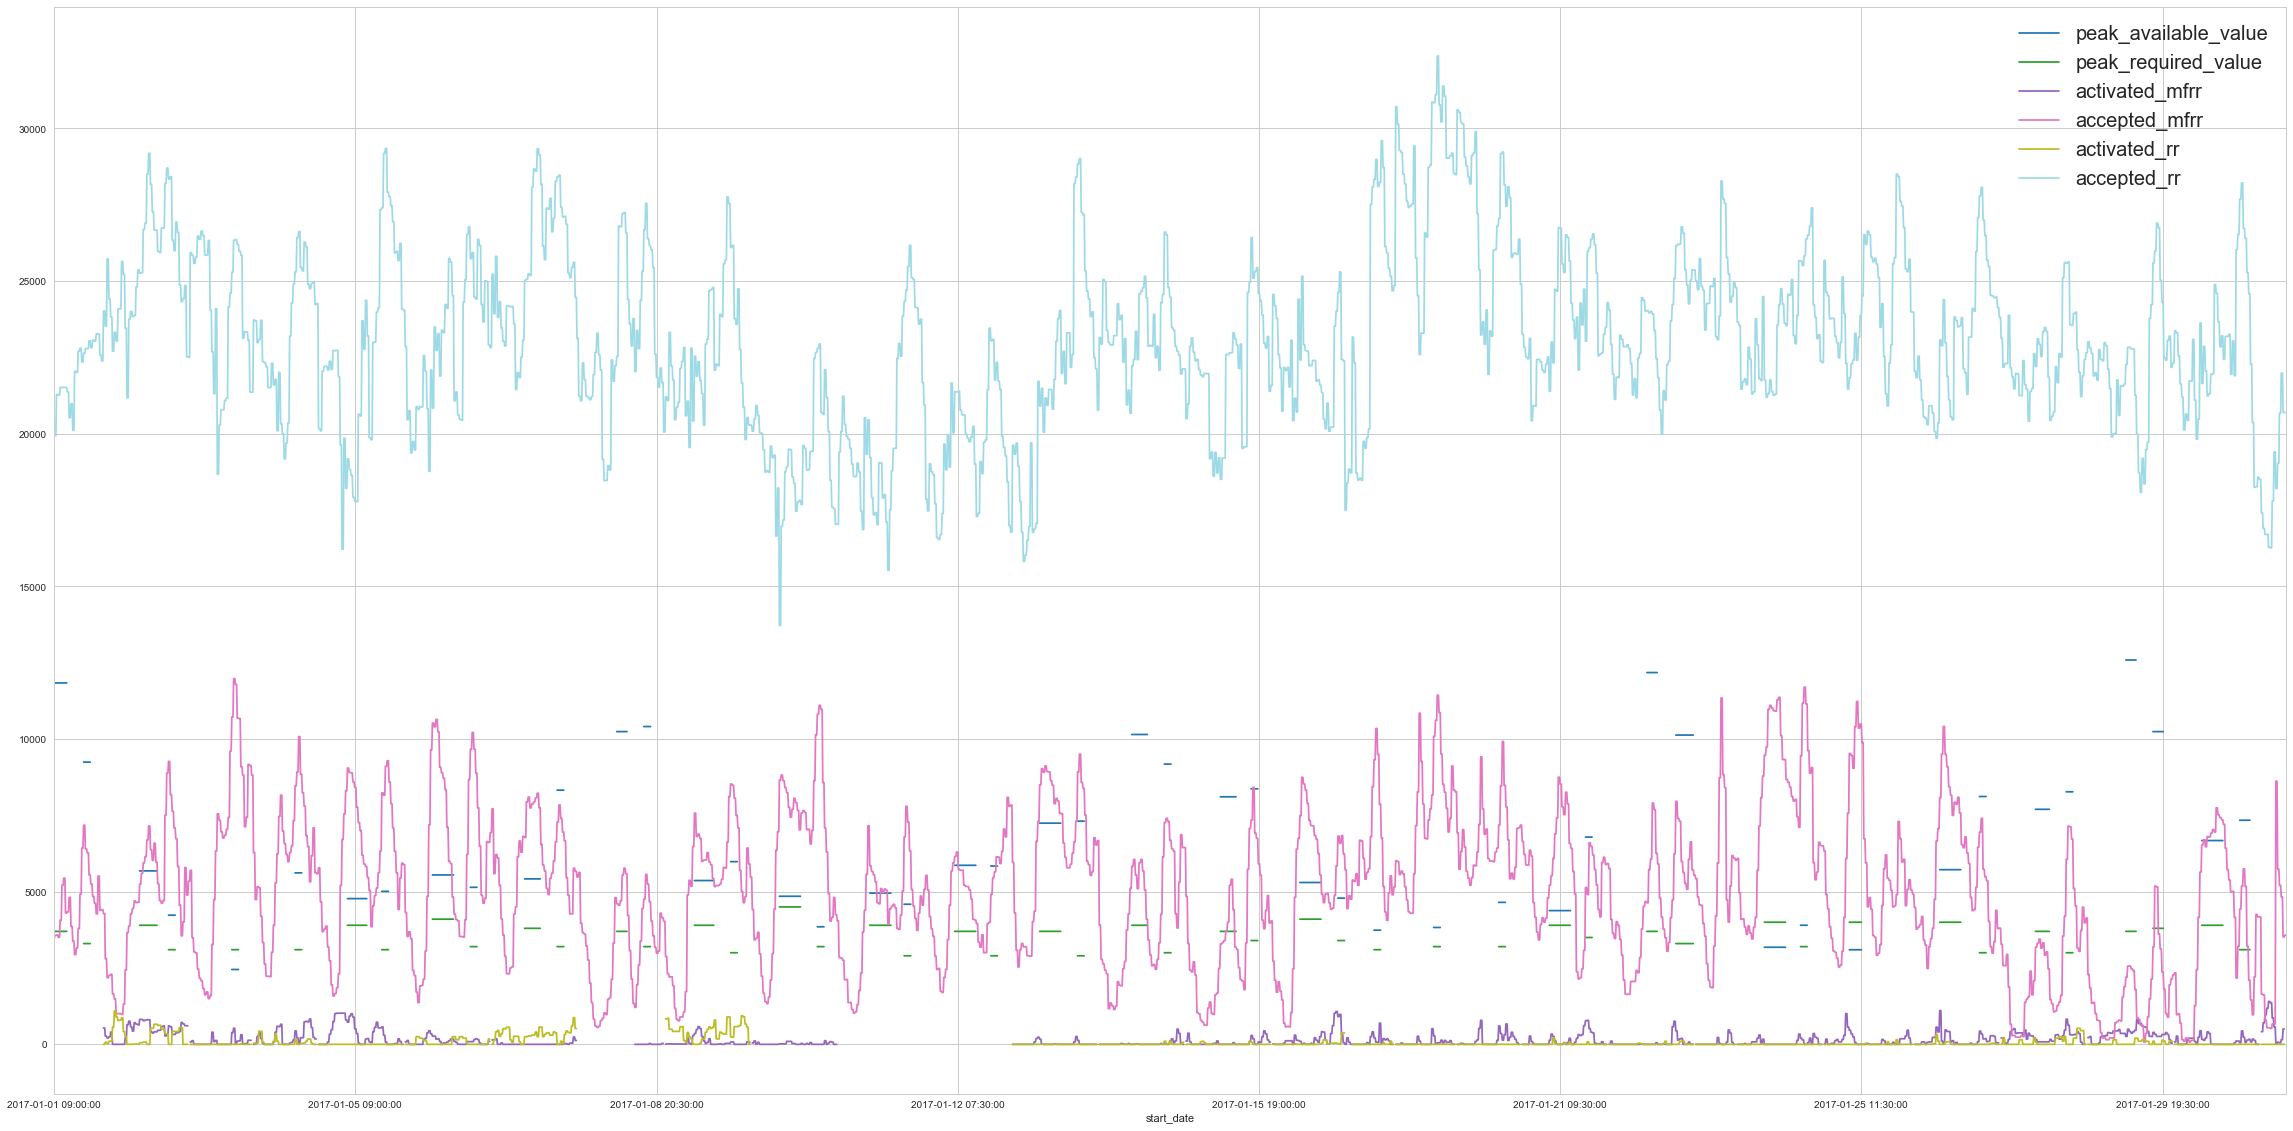

In [218]:
query_df = sqldf(
    rq.MA_query.format(
        procured_direction="UP_DOWN", 
        accepted_direction="DOWNWARD", 
        activated_direction="DOWNWARD", 
        downgraded="'NORMAL'")
    , locals())
query_df.set_index("start_date", inplace=True)
query_df.plot(figsize=(40,20), colormap=cm.tab20)
plt.legend(fontsize=20)
plt.show()

### Matrice de corrélation avec les cluster basés sur la corrélation de pearson

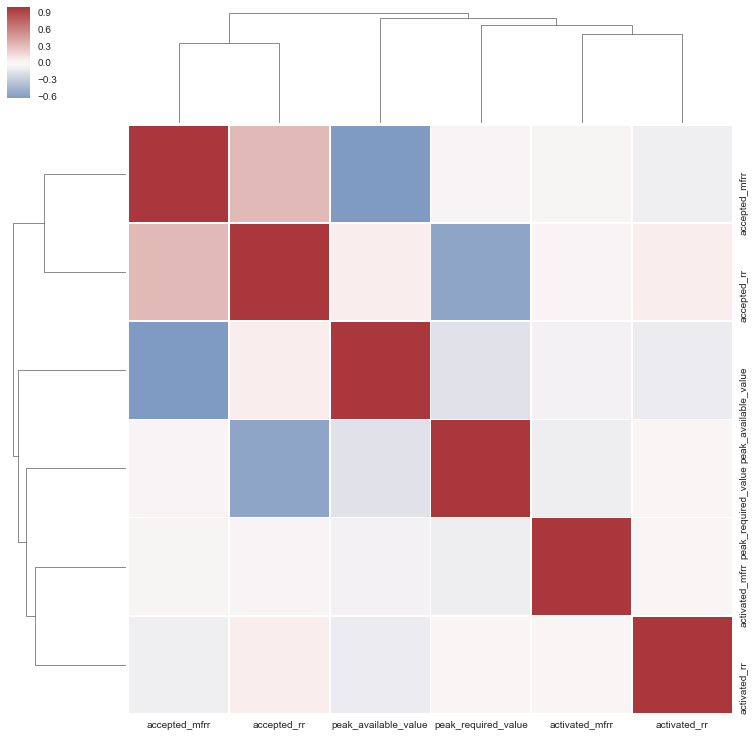

In [219]:
# Draw the full plot
sns.clustermap(query_df.corr(), center=0, cmap="vlag",
               linewidths=.75, figsize=(13, 13))
plt.show()

In [220]:
# direction_query_df = sqldf(
#     direction_query.format(
#         resource="accepted_offers", 
#         resource_type="MFRR", 
#         value_type="value", 
#         downgraded="'NORMAL'")
#     , locals())
# direction_query_df.set_index("start_date", inplace=True)
# direction_query_df.plot(figsize=(40,20), colormap=cm.tab20)
# plt.legend(fontsize=20)
# plt.show()

In [221]:

# g = sns.PairGrid(direction_query_df,
#                  x_vars=["weekday", "direction", "downgraded", "alert"],
#                  y_vars=list(direction_query_df.select_dtypes(include=["float",'long']).columns),
#                  aspect=.75, size=4)
# g.map(sns.violinplot, palette="pastel");
# g = sns.PairGrid(query_df,
#                  x_vars=["weekday", "direction", "downgraded", "alert"],
#                  y_vars=list(query_df.select_dtypes(include=["float",'long']).columns),
#                  aspect=.75, size=4)
# g.map(sns.violinplot, palette="pastel");
# plt.show()
# plt.show()

### Prix ou Volume d'offres activés par type de réserves en fonction du jour de la semaine et de la direction sur la période 1

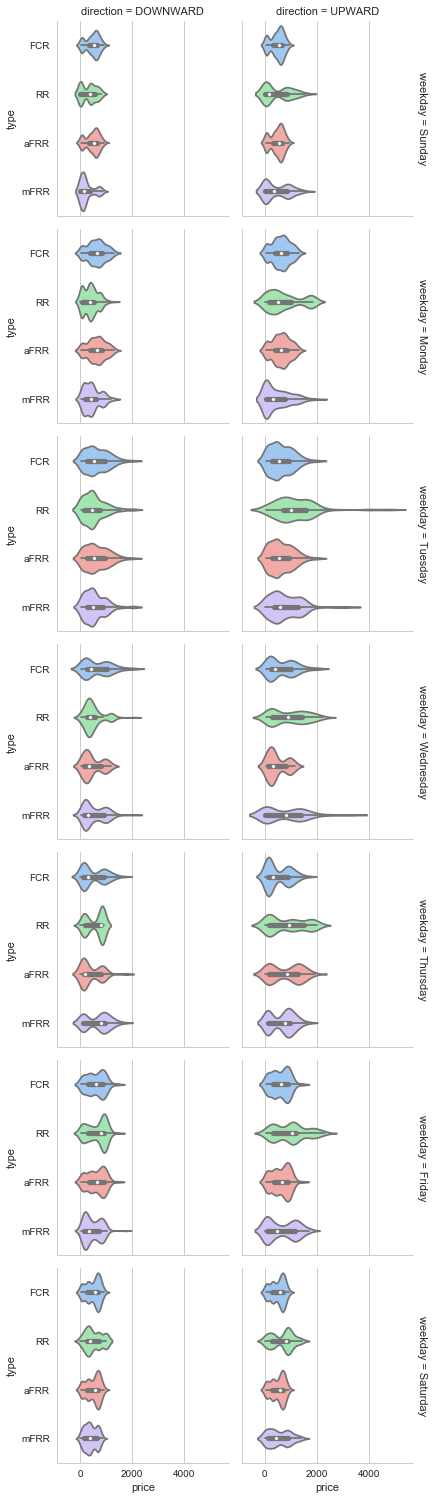

In [217]:
weekday_query_df = sqldf(
    weekday_query.format(
        table_df="table_df",
        resource="activated_offers",
        value_type="price"),
    locals())

if not weekday_query_df.empty:
    curve_name = list(weekday_query_df.select_dtypes(include=["float",'long']).columns)[0]
    
    g = sns.FacetGrid(weekday_query_df, row='weekday', col='direction',margin_titles=True)
    g.map(sns.violinplot, curve_name, 'type',palette="pastel")
    plt.show()
else:
    print "weekday_query_df is empty"


### Prix ou Volume d'offres activés par type de réserves en fonction du jour de la semaine et de la direction sur la période 2

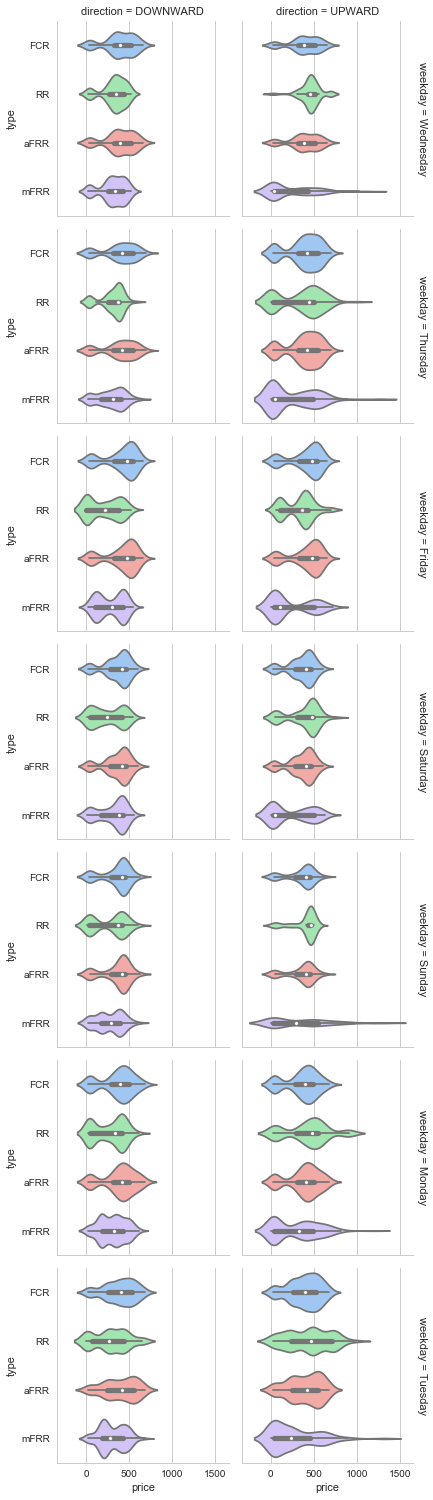

In [216]:
weekday_query_df2 = sqldf(
    weekday_query.format(
        table_df="table_df2",
        resource="activated_offers",
        value_type="price"),
    locals())

if not weekday_query_df2.empty:
    curve_name = list(weekday_query_df2.select_dtypes(include=["float",'long']).columns)[0]
    
    g = sns.FacetGrid(weekday_query_df2, row='weekday', col='direction',margin_titles=True)
    g.map(sns.violinplot, curve_name, 'type',palette="pastel")
    plt.show()
else:
    print "weekday_query_df is empty"

In [198]:
fig = plt.figure()
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)

g = sns.FacetGrid(weekday_query_df, row='weekday', col='direction',margin_titles=True)
g.map(sns.violinplot, curve_name, 'type',palette="pastel", ax=ax1)
# Close the FacetGrid figure which we don't need (g.fig)
plt.close(g.fig)

g = sns.FacetGrid(weekday_query_df, row='weekday', col='direction',margin_titles=True)
g.map(sns.violinplot, curve_name, 'type',palette="pastel", ax=ax2)
# Close the FacetGrid figure which we don't need (g.fig)
plt.close(g.fig)

plt.show()

AttributeError: 'FacetGrid' object has no attribute 'subplot_kws'

In [43]:
# Provide the path to the yaml file relative to the working directory
display(HTML('''<style>
    .widget-label { min-width: 20ex !important; }
    .widget-text { min-width: 60ex !important; }
</style>'''))

#Toggle Code
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();

 } else {
 $('div.input').show();

 }
 code_show = !code_show
} 
//$( document ).ready(code_toggle);//commenting code disabling by default
</script>
<form action = "javascript:code_toggle()"><input type="submit" value="Toggle Raw Code"></form>''')